## Composite laminate

Starting from a list of properties for the matrix and fibers we use rules of mixtures expressions to obtain the properties of a unidirectional ply. The ply properties are then used to compute the properties of the laminate using the Complam tool in nanoHUB.

In [1]:
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath('../../..'))
import hublib.rappture as rappture
io = rappture.Tool("complam")

In [2]:
io.inputs()

Path,Label,Description
input.group(tabs).group(Material).number(E1),E1,Longitudinal Young's Modulus
input.group(tabs).group(Material).number(E2),E2,Transverse Young's Modulus In-Plane
input.group(tabs).group(Material).number(nu12),nu12,Major In-Plane Poisson's Ratio
input.group(tabs).group(Material).number(G12),G12,Major In-Plane Shear Modulus
input.group(tabs).group(Material).number(alpha1),alpha1,Longitudinal Thermal Expansion Coefficie
input.group(tabs).group(Material).number(alpha2),alpha2,Transverse Thermal Expansion Coefficient
input.group(tabs).group(Layup).number(h0),h0,Lamina Thickenss
input.group(tabs).group(Layup).string(theta),theta,Lamina Angle
input.group(tabs).group(Loading).number(Nx),Nx,Applied Normal Edge Force in X-Direction
input.group(tabs).group(Loading).number(Ny),Ny,Applied Normal Edge Force in Y-Direction


Fiber properties: $E_1$, $E_2$, $G_{12}$, $\nu_{12}$, $\nu_{23}$, $\alpha_1$, $\alpha_2$

In [3]:
AS4 = [234.0e9, 19.5e9, 93.0e9, 0.26, 0.70, -0.4e-6, 5.6e-6]
IM6 = [276.0e9, 19.5e9, 109.0e9, 0.26, 0.70, -0.4e-6, 5.6e-6]
IM7 = [276.0e9, 19.5e9, 109.0e9, 0.26, 0.70, -0.4e-6, 5.0e-6]
IM8 = [303.0e9, 25.0e9, 120.0e9, 0.26, 0.70, -0.3e-6, 5.0e-6]
PANEX = [228.0e9, 19.5e9, 80.0e9, 0.25, 0.70, -0.4e-6, 5.6e-6]
T300 = [231.0e9, 19.5e9, 91.0e9, 0.27, 0.70, -0.6e-6, 9.0e-6]
T40 = [283.0e9, 19.5e9, 107.0e9, 0.32, 0.70, -0.4e-6, 5.6e-6]
T50 = [393.0e9, 19.5e9, 159.0e9, 0.24, 0.70, -0.4e-6, 5.6e-6]
T55 = [379.0e9, 19.5e9, 142.0e9, 0.33, 0.70, -0.4e-6, 5.6e-6]
T75 = [517.0e9, 19.5e9, 204.0e9, 0.27, 0.70, -0.4e-6, 5.6e-6]

fiber = [IM6, IM7, IM8, PANEX, T300, T40, T50, T55, T75]

Matrix properties: $E$, $\nu$, $\alpha$

In [4]:
matrix = [[3.4E9, 0.37, 65.0E-6], 
          [4.1E9, 0.28, 65.0E-6],
          [2.8E9, 0.32, 65.0E-6],
          [4.4E9, 0.31, 65.0E-6],
         [3.9E9, 0.33, 65.0E-6],
         [3.7E9, 0.35, 65.0E-6]]

Volume fractions and fiber and matrix

In [5]:
Vf = 0.6
Vm = 1.-Vf

Loop over pairs of matrix/fiber and compute ply properties

In [6]:
Ex = []
nu = []
Gxy = []
for fiber_p in fiber:
    for matrix_p in matrix:
        #print(fiber_p)
        #print(matrix_p)
        E1 = fiber_p[0] * Vf + matrix_p[0] * Vm
        nu12 = fiber_p[3] * Vf + matrix_p[1] * Vm
        E2 = 1.0 / (Vf / fiber_p[1] + Vm / matrix_p[0])
        Gm = matrix_p[0] / (2.0 * (1.0 + matrix_p[1]))
        G12 = 1.0 / (Vf / fiber_p[2] + Vm / Gm)
        alpha1 = (fiber_p[5] * fiber_p[0] * Vf + matrix_p[2] * matrix_p[0] * Vm) / \
                 (fiber_p[0] * Vf + matrix_p[0] * Vm)
        # alpha2 = Vf * (fiber_p[6] - (matrix_p[0] / fiber_p[0]) * fiber_p[4] * \
        #          (matrix_p[2] - fiber_p[5]) * Vm) + Vm * \
        #          (matrix_p[2] + (fiber_p[0] / matrix_p[0]) * \
        #           matrix_p[1] * (matrix_p[2] - fiber_p[5]) * Vf)
        alpha2 = fiber_p[6] * Vf + matrix_p[2] * Vm
        #print E1/1e9, E2/1e9, nu12, G12/1.e9, alpha1, alpha2

        # Set input values for the Complam tool
        material = io['input.group(tabs).group(Material)']
        material['number(E1).current'] = E1 / 1e9
        material['number(E2).current'] = E2 / 1e9
        material['number(nu12).current'] = nu12
        material['number(G12).current'] = G12 / 1.0e9
        material['number(alpha1).current'] = alpha1
        material['number(alpha2).current'] = alpha2
        # Run the complam tool
        io.run()
        # Get the output from the tool and save for plotting later
        Ex.append(io['output.number(Ex).current'].value.magnitude)
        nu.append(io['output.number(nu).current'].value)
        Gxy.append(io['output.number(Gxy).current'].value.magnitude)
print('Done running composites laminate tool')

Writing /home/nanohub/mmh/data/sessions/1085768/tool_driver_16410.xml
cmd= PATH=/apps/complam/current/bin:$PATH /apps/bin/rappture -execute /home/nanohub/mmh/data/sessions/1085768/tool_driver_16410.xml -tool /apps/complam/current/rappture/tool.xml > /home/nanohub/mmh/data/sessions/1085768/tool_run_16410.xml
Writing /home/nanohub/mmh/data/sessions/1085768/tool_driver_16410.xml
cmd= PATH=/apps/complam/current/bin:$PATH /apps/bin/rappture -execute /home/nanohub/mmh/data/sessions/1085768/tool_driver_16410.xml -tool /apps/complam/current/rappture/tool.xml > /home/nanohub/mmh/data/sessions/1085768/tool_run_16410.xml
Writing /home/nanohub/mmh/data/sessions/1085768/tool_driver_16410.xml
cmd= PATH=/apps/complam/current/bin:$PATH /apps/bin/rappture -execute /home/nanohub/mmh/data/sessions/1085768/tool_driver_16410.xml -tool /apps/complam/current/rappture/tool.xml > /home/nanohub/mmh/data/sessions/1085768/tool_run_16410.xml
Writing /home/nanohub/mmh/data/sessions/1085768/tool_driver_16410.xml
cmd

In [7]:
val = io['output.number(Gxy).current'].value
print(val)
print(val.magnitude)
print(val.units)
print(val.to('kPa'))
print(val.to('kPa').magnitude)

78.7989 pascal
78.7989
pascal
0.0787989 kilopascal
0.0787989


In [8]:
'{:~}'.format(val)

'78.7989 Pa'

Plot Longitudinal modulus (Ex) vs. Shear modulus (Gxy)

<IPython.core.display.Javascript object>


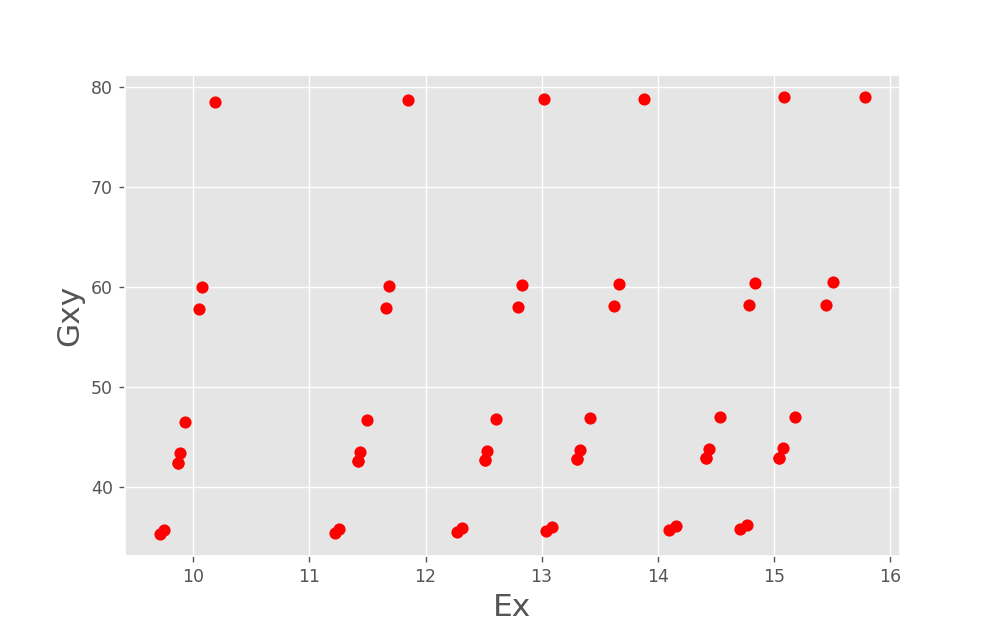

In [9]:
%matplotlib notebook
plt.style.use('ggplot')

plt.figure(figsize=(8,5))
plt.plot(Ex, Gxy, 'ro')
plt.xlabel('Ex', fontsize=18)
plt.ylabel('Gxy', fontsize=18);

<IPython.core.display.Javascript object>


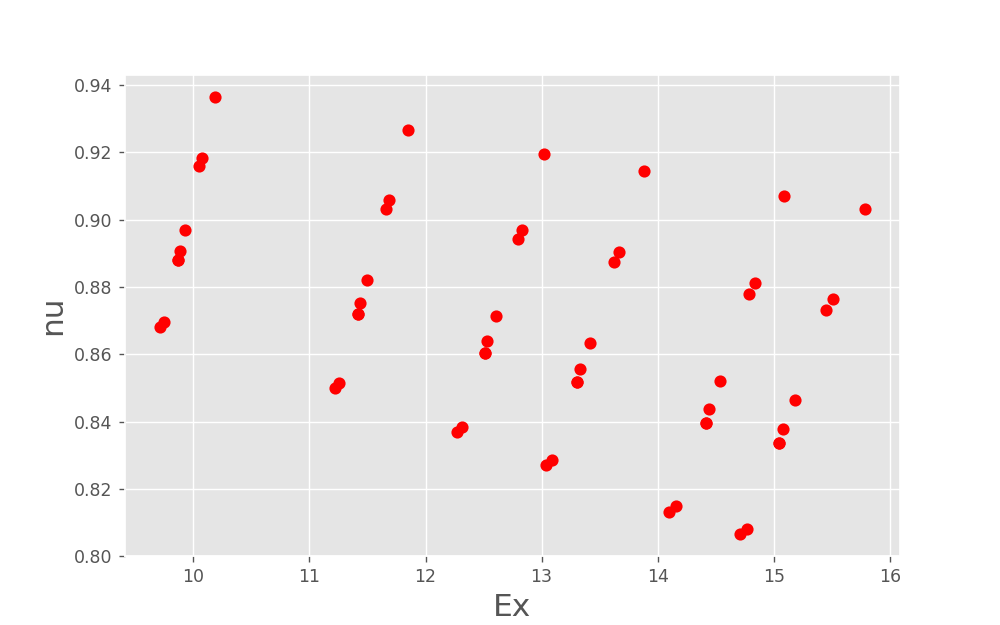

In [10]:
plt.figure(figsize=(8,5))
plt.plot(Ex, nu, 'ro')
plt.xlabel('Ex', fontsize=18)
plt.ylabel('nu', fontsize=18);

<IPython.core.display.Javascript object>


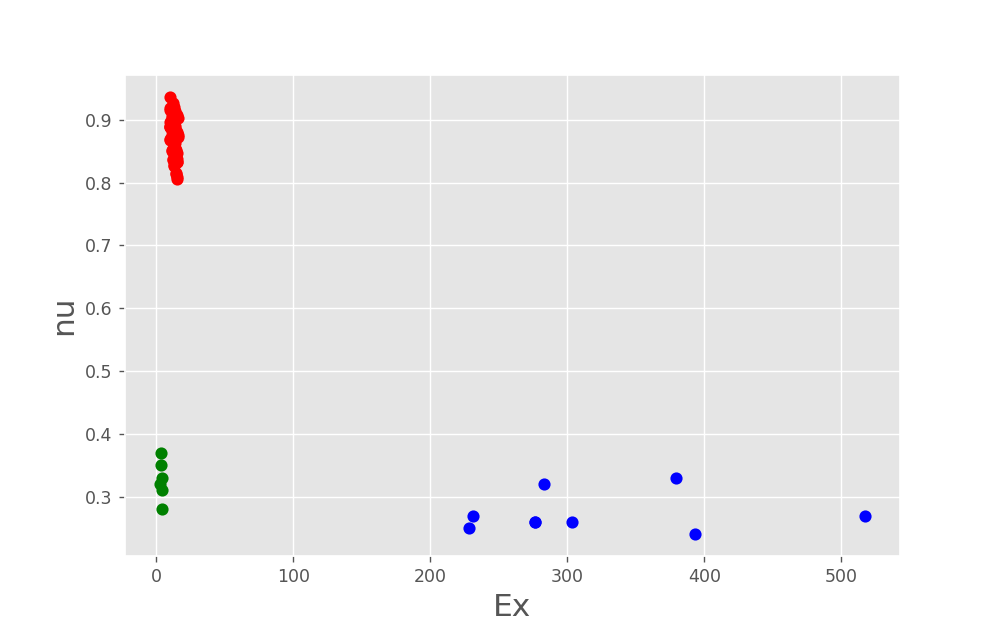

In [11]:
plt.figure(figsize=(8,5))
plt.plot(Ex, nu, 'ro')

# need to convert fiber list to array so we can extract columns
fiber = np.array(fiber)
plt.plot(fiber[:,0] / 1e9, fiber[:,3], 'bo')

matrix = np.array(matrix)
plt.plot(matrix[:,0] / 1e9, matrix[:,1], 'go')

plt.xlabel('Ex', fontsize=18)
plt.ylabel('nu', fontsize=18);

<h2>Maybe it looks better with a log axis</h2>

<IPython.core.display.Javascript object>


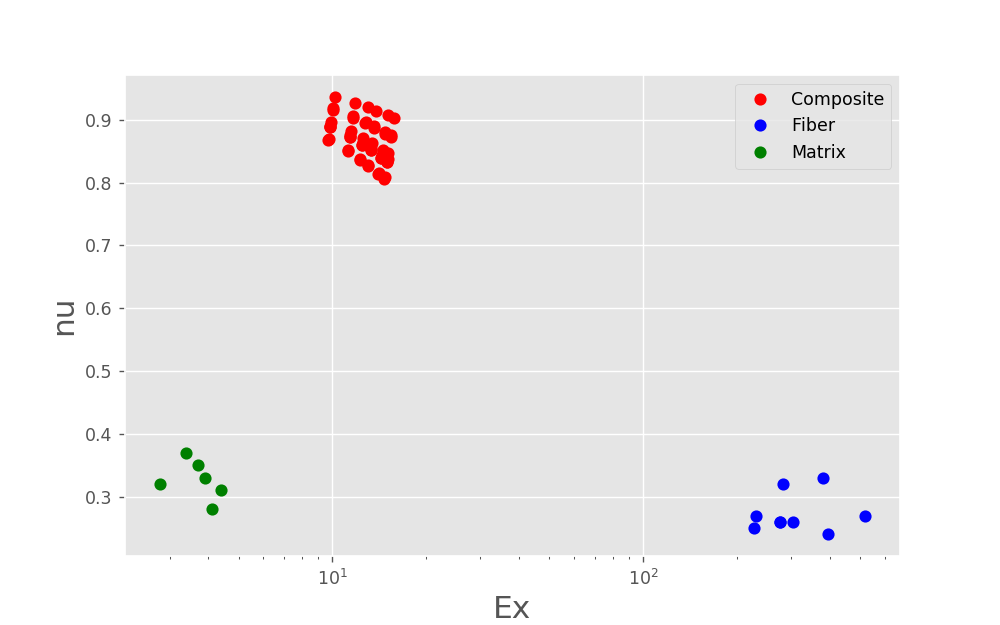

In [12]:
plt.figure(figsize=(8,5))
plt.semilogx(Ex, nu, 'ro', label='Composite')

# need to convert fiber list to array so we can extract columns
fiber = np.array(fiber)
plt.semilogx(fiber[:,0] / 1e9, fiber[:,3], 'bo', label="Fiber")

matrix = np.array(matrix)
plt.semilogx(matrix[:,0] / 1e9, matrix[:,1], 'go', label="Matrix")

plt.legend()
plt.xlabel('Ex', fontsize=18)
plt.ylabel('nu', fontsize=18);

In [16]:
os.environ['HOME']

'/home/nanohub/mmh'

In [17]:
os.path.join(os.environ['HOME'], 'data/sessions', os.environ['SESSION'])

'/home/nanohub/mmh/data/sessions/1085768'